In [3]:
import tensorflow as tf
import gc
tf.keras.backend.clear_session()
gc.collect()

109

In [8]:
import os
import shutil
import numpy as np

# Path to your dataset
data_dir = r"C:\Users\rushi\Downloads\EcoSortAI\garbage_classification"
output_dir = r"C:\Users\rushi\Downloads\EcoSortAI\split_dataset"

# Create base output directories
for split in ["train", "val", "test"]:
    split_path = os.path.join(output_dir, split)
    os.makedirs(split_path, exist_ok=True)

# Fix random seed for reproducibility
np.random.seed(42)

# Go through each class folder
class_names = sorted(os.listdir(data_dir))
for cname in class_names:
    class_dir = os.path.join(data_dir, cname)
    files = [f for f in os.listdir(class_dir) if f.lower().endswith(".jpg")]
    np.random.shuffle(files)

    n_total = len(files)
    n_test = int(0.1 * n_total)
    n_val = int(0.1 * n_total)
    n_train = n_total - n_test - n_val

    train_files = files[:n_train]
    val_files = files[n_train:n_train + n_val]
    test_files = files[n_train + n_val:]

    # Copy to split folders
    for split, split_files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
        split_class_dir = os.path.join(output_dir, split, cname)
        os.makedirs(split_class_dir, exist_ok=True)
        for f in split_files:
            shutil.copy(os.path.join(class_dir, f), os.path.join(split_class_dir, f))

print("✅ Dataset successfully split into train/val/test (80-10-10).")

# Summary check
for split in ["train", "val", "test"]:
    print(f"\n{split.upper()} set:")
    for cname in class_names:
        count = len(os.listdir(os.path.join(output_dir, split, cname)))
        print(f"  {cname}: {count} images")


✅ Dataset successfully split into train/val/test (80-10-10).

TRAIN set:
  battery: 757 images
  biological: 789 images
  brown-glass: 487 images
  cardboard: 713 images
  clothes: 4261 images
  green-glass: 505 images
  metal: 617 images
  paper: 840 images
  plastic: 693 images
  shoes: 1583 images
  trash: 559 images
  white-glass: 621 images

VAL set:
  battery: 94 images
  biological: 98 images
  brown-glass: 60 images
  cardboard: 89 images
  clothes: 532 images
  green-glass: 62 images
  metal: 76 images
  paper: 105 images
  plastic: 86 images
  shoes: 197 images
  trash: 69 images
  white-glass: 77 images

TEST set:
  battery: 94 images
  biological: 98 images
  brown-glass: 60 images
  cardboard: 89 images
  clothes: 532 images
  green-glass: 62 images
  metal: 76 images
  paper: 105 images
  plastic: 86 images
  shoes: 197 images
  trash: 69 images
  white-glass: 77 images


In [9]:
import os
import shutil
import numpy as np

# Paths
split_dir = r"C:\Users\rushi\Downloads\EcoSortAI\split_dataset"
balanced_dir = r"C:\Users\rushi\Downloads\EcoSortAI\split_dataset_balanced"

# Create balanced dataset dirs
for split in ["train", "val", "test"]:
    split_path = os.path.join(balanced_dir, split)
    os.makedirs(split_path, exist_ok=True)

np.random.seed(42)

# Balance each split separately
for split in ["train", "val", "test"]:
    class_counts = {}
    class_dirs = [d for d in os.listdir(os.path.join(split_dir, split)) if os.path.isdir(os.path.join(split_dir, split, d))]

    # Count files per class
    for cname in class_dirs:
        files = [f for f in os.listdir(os.path.join(split_dir, split, cname)) if f.lower().endswith(".jpg")]
        class_counts[cname] = len(files)

    # Find minimum class size
    min_count = min(class_counts.values())
    print(f"\n{split.upper()} -> Balancing all classes to {min_count} images")

    # Downsample all classes
    for cname in class_dirs:
        src_class_dir = os.path.join(split_dir, split, cname)
        dst_class_dir = os.path.join(balanced_dir, split, cname)
        os.makedirs(dst_class_dir, exist_ok=True)

        files = [f for f in os.listdir(src_class_dir) if f.lower().endswith(".jpg")]
        np.random.shuffle(files)
        selected_files = files[:min_count]  # keep only min_count

        for f in selected_files:
            shutil.copy(os.path.join(src_class_dir, f), os.path.join(dst_class_dir, f))

    print("Class counts after balancing:")
    for cname in class_dirs:
        count = len(os.listdir(os.path.join(balanced_dir, split, cname)))
        print(f"  {cname}: {count} images")

print("\n✅ Dataset balanced and saved at:", balanced_dir)



TRAIN -> Balancing all classes to 487 images
Class counts after balancing:
  battery: 487 images
  biological: 487 images
  brown-glass: 487 images
  cardboard: 487 images
  clothes: 487 images
  green-glass: 487 images
  metal: 487 images
  paper: 487 images
  plastic: 487 images
  shoes: 487 images
  trash: 487 images
  white-glass: 487 images

VAL -> Balancing all classes to 60 images
Class counts after balancing:
  battery: 60 images
  biological: 60 images
  brown-glass: 60 images
  cardboard: 60 images
  clothes: 60 images
  green-glass: 60 images
  metal: 60 images
  paper: 60 images
  plastic: 60 images
  shoes: 60 images
  trash: 60 images
  white-glass: 60 images

TEST -> Balancing all classes to 60 images
Class counts after balancing:
  battery: 60 images
  biological: 60 images
  brown-glass: 60 images
  cardboard: 60 images
  clothes: 60 images
  green-glass: 60 images
  metal: 60 images
  paper: 60 images
  plastic: 60 images
  shoes: 60 images
  trash: 60 images
  white

TensorFlow version: 2.10.0
GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 5844 images belonging to 12 classes.
Found 720 images belonging to 12 classes.
Found 720 images belonging to 12 classes.
Epoch 1/75
366/366 [==============================] - 115s 302ms/step - loss: 2.5245 - accuracy: 0.3658 - val_loss: 2.4459 - val_accuracy: 0.3083 - lr: 1.0000e-04
Epoch 2/75
366/366 [==============================] - 101s 275ms/step - loss: 1.7528 - accuracy: 0.4526 - val_loss: 1.3917 - val_accuracy: 0.5597 - lr: 1.0000e-04
Epoch 3/75
366/366 [==============================] - 100s 273ms/step - loss: 1.6580 - accuracy: 0.4887 - val_loss: 1.3467 - val_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 4/75
366/366 [==============================] - 97s 264ms/step - loss: 1.5716 - accuracy: 0.5021 - val_loss: 1.1915 - val_accuracy: 0.6250 - lr: 1.0000e-04
Epoch 5/75
366/366 [==============================] - 97s 264ms/step - loss: 1.5240 - accuracy: 0.5151 - val_loss

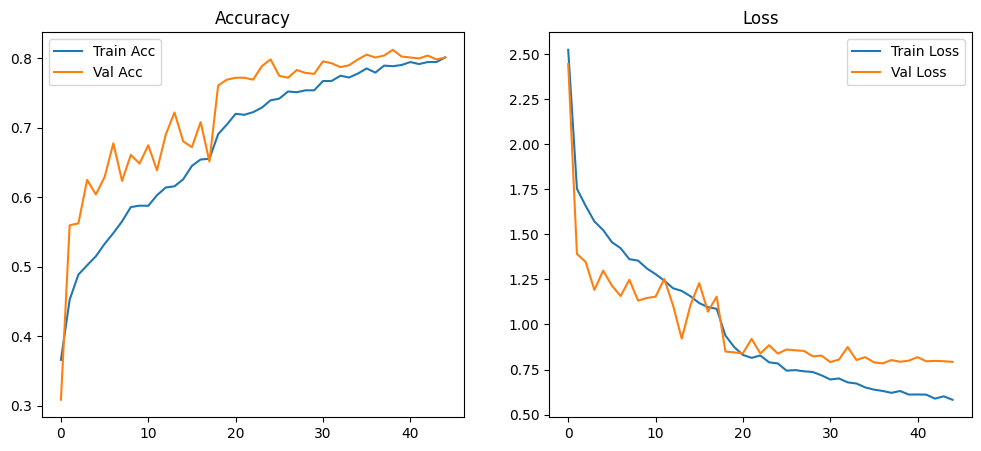

45/45 [==============================] - 11s 247ms/step - loss: 0.7529 - accuracy: 0.7917

🎯 Final Test Accuracy: 79.17%
45/45 [==============================] - 2s 39ms/step


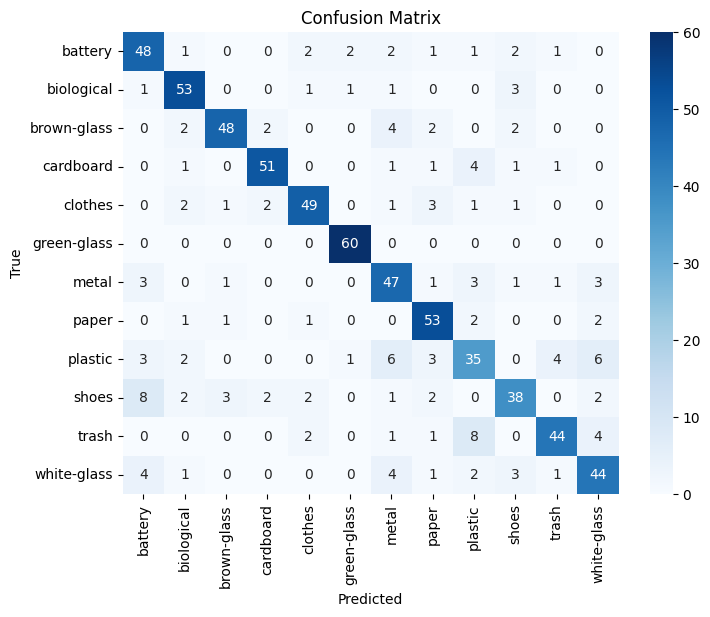


Classification Report:
              precision    recall  f1-score   support

     battery       0.72      0.80      0.76        60
  biological       0.82      0.88      0.85        60
 brown-glass       0.89      0.80      0.84        60
   cardboard       0.89      0.85      0.87        60
     clothes       0.86      0.82      0.84        60
 green-glass       0.94      1.00      0.97        60
       metal       0.69      0.78      0.73        60
       paper       0.78      0.88      0.83        60
     plastic       0.62      0.58      0.60        60
       shoes       0.75      0.63      0.68        60
       trash       0.85      0.73      0.79        60
 white-glass       0.72      0.73      0.73        60

    accuracy                           0.79       720
   macro avg       0.79      0.79      0.79       720
weighted avg       0.79      0.79      0.79       720



In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# ✅ Check GPU availability
print("TensorFlow version:", tf.__version__)
print("GPUs detected:", tf.config.list_physical_devices('GPU'))

base_path = r"C:\Users\rushi\Downloads\EcoSortAI\split_dataset_balanced"
train_dir = os.path.join(base_path, "train")
val_dir   = os.path.join(base_path, "val")
test_dir  = os.path.join(base_path, "test")

# Parameters
img_size = 224
batch_size = 16
epochs = 75

# ✅ Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ✅ Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint("best_garbage_model.h5", save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6)
]

# ✅ Train
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks
)

# ✅ Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

# ✅ Evaluate on Test Set
loss, acc = model.evaluate(test_generator)
print(f"\n🎯 Final Test Accuracy: {acc * 100:.2f}%")

# ✅ Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


In [5]:
# Save final model
model.save("ecosortai_final_model.h5")
print("✅ Final EcoSortAI model saved as ecosortai_final_model.h5")


✅ Final EcoSortAI model saved as ecosortai_final_model.h5


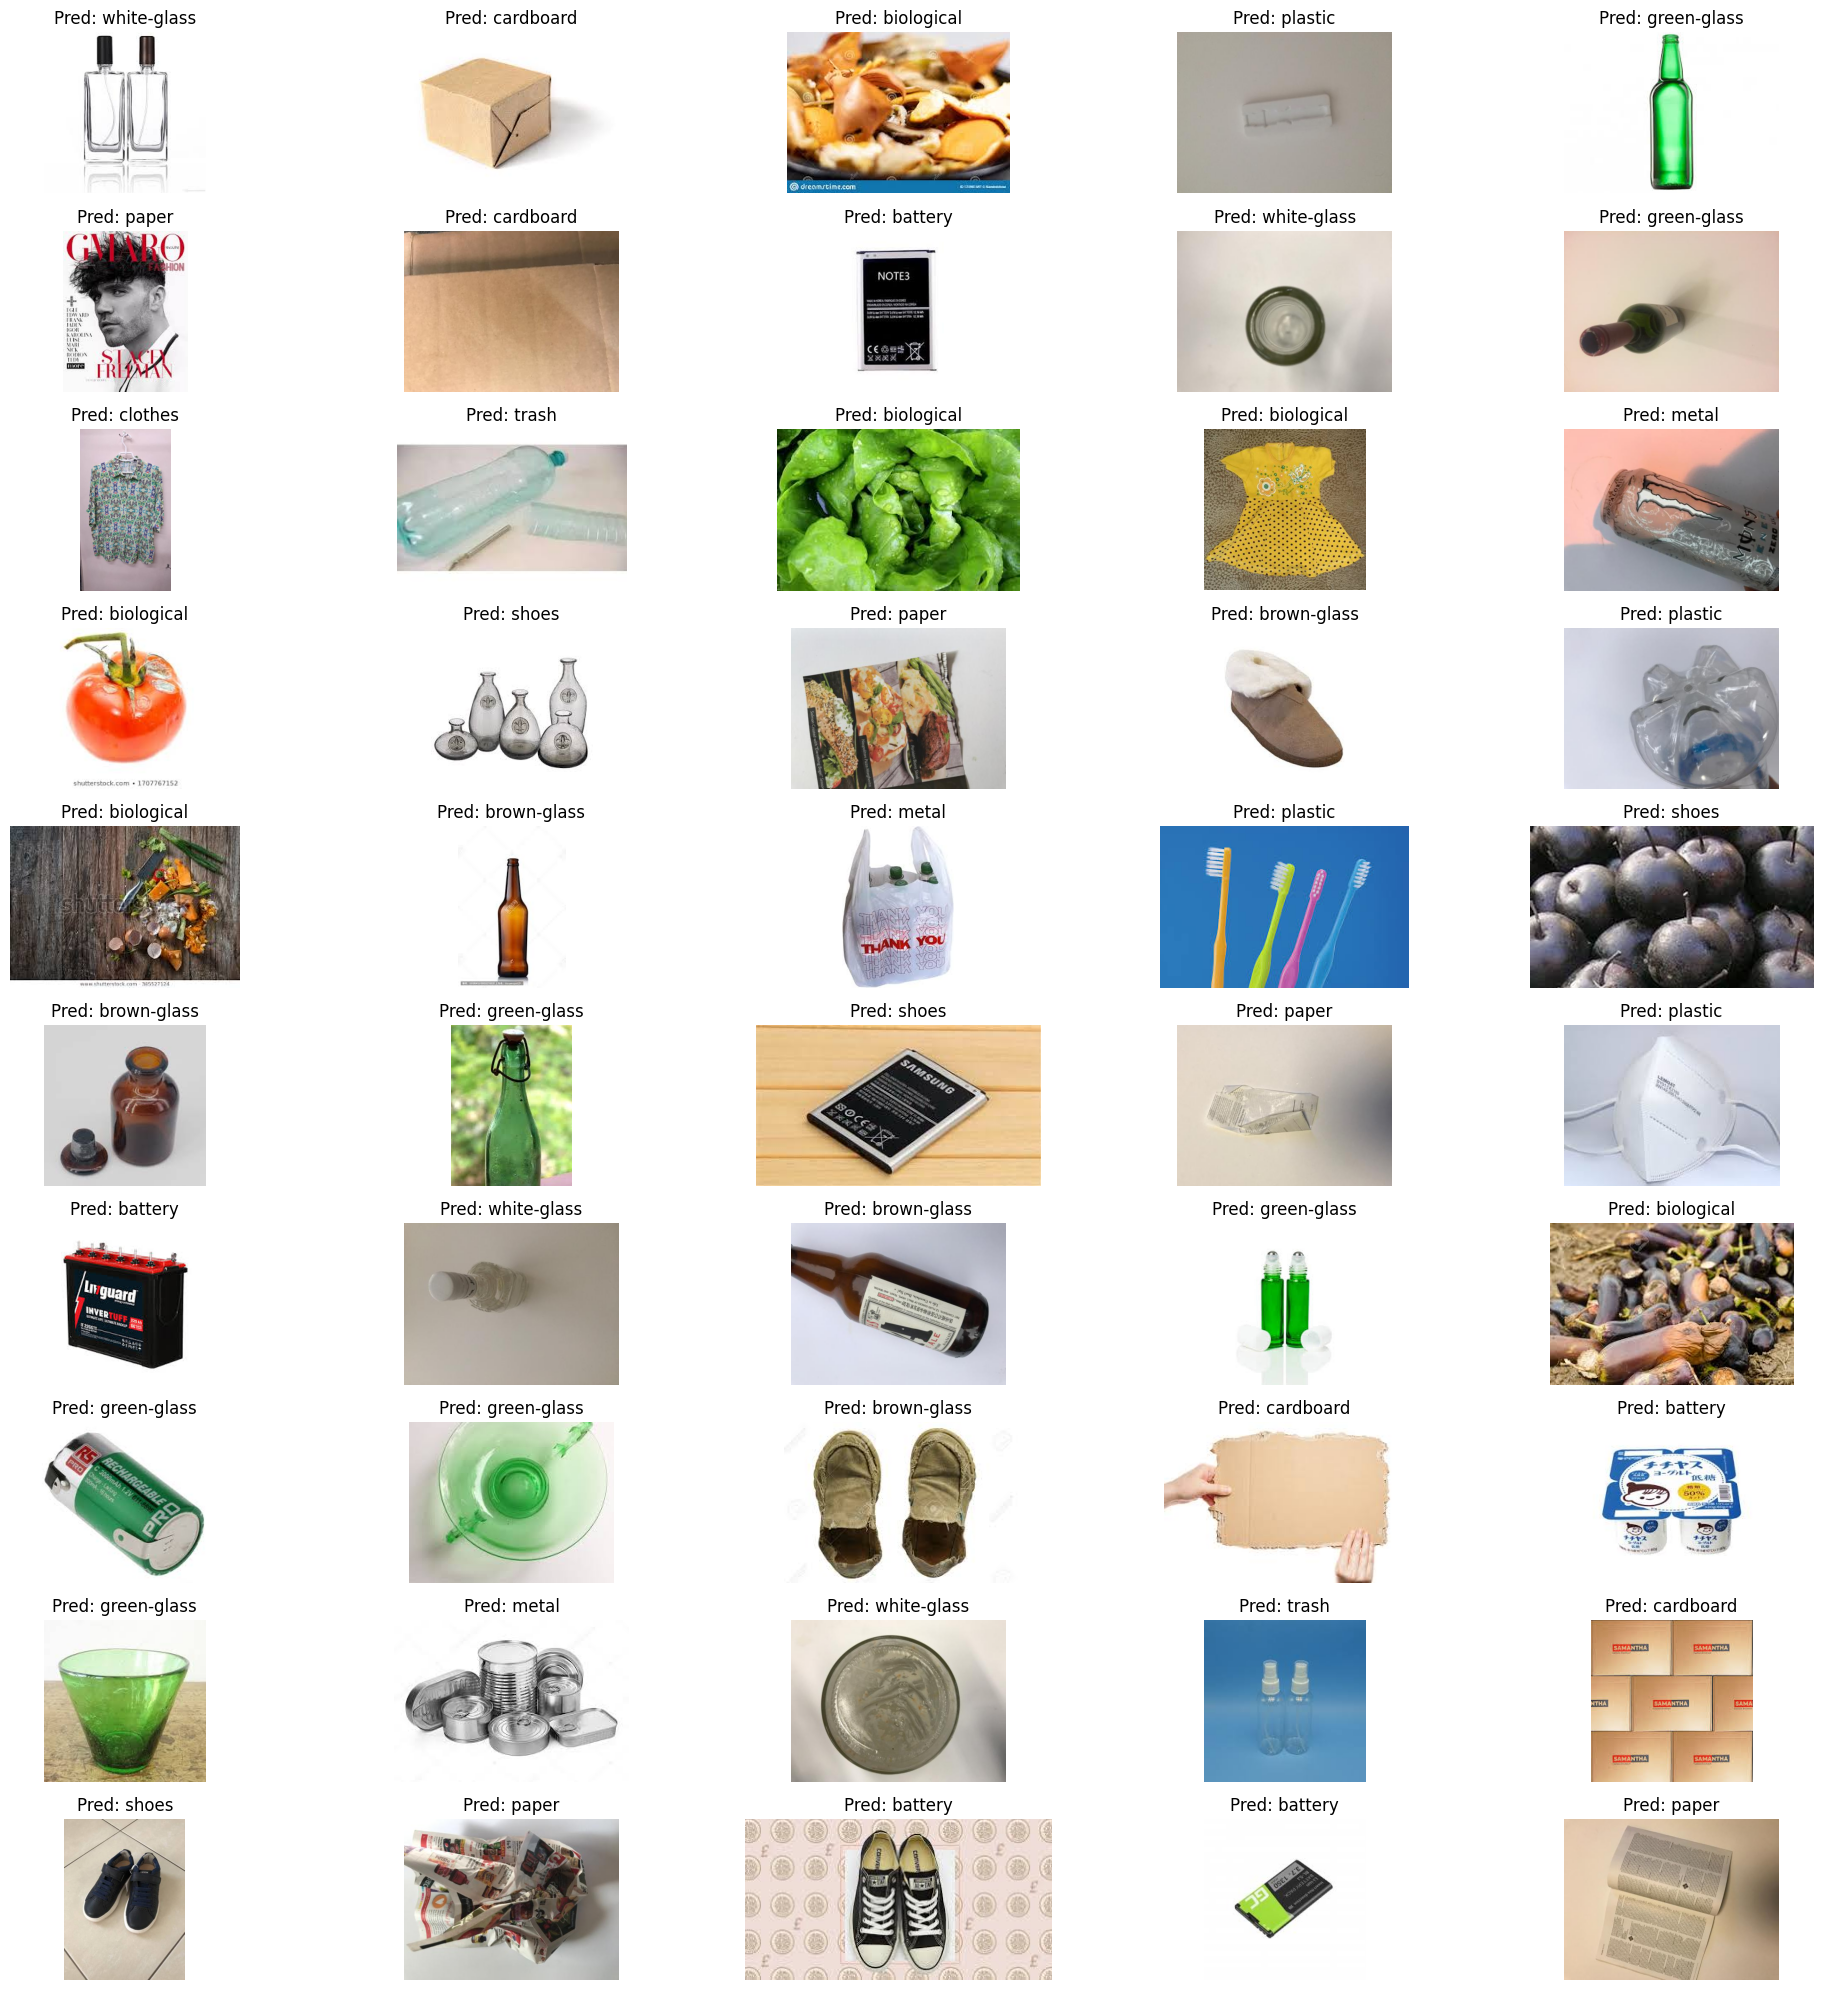

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import random

# ✅ Load best saved model
model = load_model("ecosortai_final_model.h5")

# ✅ Path to test set
test_dir = r"C:\Users\rushi\Downloads\EcoSortAI\split_dataset_balanced\test"

# ✅ Class labels
class_indices = {
    'battery': 0,
    'biological': 1,
    'brown-glass': 2,
    'cardboard': 3,
    'clothes': 4,
    'green-glass': 5,
    'metal': 6,
    'paper': 7,
    'plastic': 8,
    'shoes': 9,
    'trash': 10,
    'white-glass': 11
}
idx_to_class = {v: k for k, v in class_indices.items()}

# ✅ Collect all test image paths
all_images = []
for cls in os.listdir(test_dir):
    cls_path = os.path.join(test_dir, cls)
    for img_file in os.listdir(cls_path):
        all_images.append(os.path.join(cls_path, img_file))

# ✅ Pick 50 random images
sample_images = random.sample(all_images, 50)

# ✅ Predict and display
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(sample_images):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)
    pred_class = idx_to_class[np.argmax(pred)]

    plt.subplot(10, 5, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Pred: {pred_class}")
    plt.axis("off")

plt.tight_layout()
plt.show()
